[View in Colaboratory](https://colab.research.google.com/github/restrepo/ComputationalMethods/blob/master/material/Minimization.ipynb)

# Minimization
Find the minumum of a function

In [71]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
import numpy as np
import scipy.optimize as optimize
import scipy.interpolate as interpolate
import pandas as pd

## Example

Consider the following dataset

In [73]:
df=pd.DataFrame({'X':[2.5,3.1,4.5,5,5.9,6.2],
              'Y':[3,-1.01,1.5,0.7,2.8,1.5]})
df

,X,Y
0,2.5,3.00
1,3.1,-1.01
2,4.5,1.50
3,5.0,0.70
4,5.9,2.80
5,6.2,1.50


### Laggrange interpolation

In [0]:
pol=interpolate.lagrange(df.X,df.Y)
x=np.linspace(df.X.iloc[0],df.X.iloc[-1])

In [55]:
print(pol)

         5         4         3         2
-0.8941 x + 19.97 x - 174.7 x + 746.7 x - 1557 x + 1264


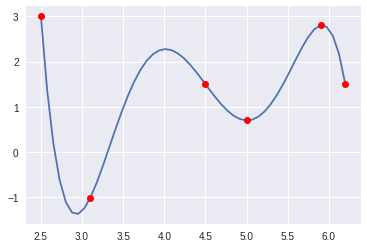

In [24]:
plt.plot(x,pol(x))
plt.plot(df.X,df.Y,'ro')

## Hermite interpolation

In [0]:
H=np.polynomial.hermite.Hermite.fit(df.X,df.Y,5)

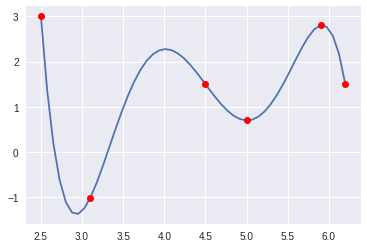

In [66]:
plt.plot(x,H(x))
plt.plot(df.X,df.Y,'ro')

Encontrando en primer mínimo cerca de <font color="red">3</font> (que resulta ser el mínimo global en [0,6]) y cerca de e <font color="red">5</font>  (un mínimo local)

In [27]:
min1=optimize.fmin_powell(pol,3,full_output=True)
min2=optimize.fmin_powell(pol,5,full_output=True)

Optimization terminated successfully.
         Current function value: -1.374113
         Iterations: 2
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.699898
         Iterations: 2
         Function evaluations: 30


In [26]:
print('El mínimo global es f(x)={} para x={}; el mínimo local es f(x)={} para x={}'.format(min1[1],min1[0],min2[1],min2[0]))

El mínimo global es f(x)=-1.3741131581291484 para x=2.9278495523433894; el mínimo local es f(x)=-1.3741131581293757 para x=2.9278493382876327


## The Higgs potential
To write greek letter inside a cell use the $\rm \LaTeX$ macro and the tab, e.g: `\mu<TAB>`, to produce μ

In [33]:
m_H=126 # GeV
G_F=1.1663787E-5 #GeV^-2
v=1/np.sqrt(np.sqrt(2.)*G_F) # GeV
μ=np.sqrt(m_H**2/2)
λ=m_H**2/(2.*v**2)
μ,λ

(89.09545442950498, 0.13093799079487806)

Text(0,0.5,'$V(\\phi)$ [GeV]')

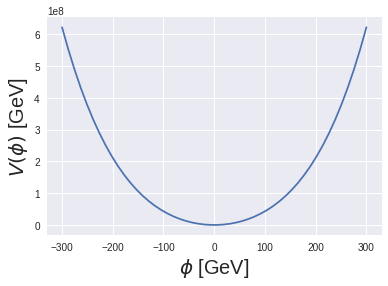

In [34]:
ϕ=np.linspace(-300,300)
Vp=lambda ϕ: 0.5*μ**2*ϕ**2+0.25*λ*ϕ**4
plt.plot(ϕ, Vp(ϕ) )
plt.xlabel(r'$\phi$ [GeV]',size=20 )
plt.ylabel(r'$V(\phi)$ [GeV]',size=20)
plt.xlabel(r'$\phi$ [GeV]',size=20 )
plt.ylabel(r'$V(\phi)$ [GeV]',size=20)
#plt.grid()

In [0]:
μ=μ*1j
V=lambda ϕ: Vp(ϕ).real

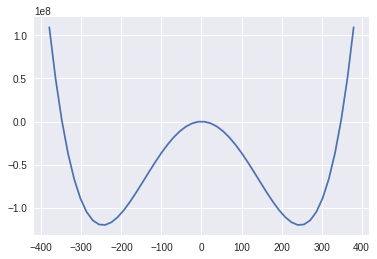

In [36]:
ϕ=np.linspace(-380,380)
plt.plot(ϕ, V(ϕ) )
#plt.grid()

In [37]:
fp=optimize.fmin_powell(V,200,ftol=1E-16,full_output=True)

Optimization terminated successfully.
         Current function value: -120308559.069597
         Iterations: 4
         Function evaluations: 74


In [0]:
ϕ_min=fp[0]

In [39]:
print(ϕ_min,v)

246.21964987858152 246.21965079413738


##  Activity 
For a complex scalar field with potential
\begin{equation}
V(\phi)=\mu^2\phi^*\phi + \lambda (\phi^*\phi)^2
\end{equation}
with 
\begin{equation}
\phi=\frac{\phi_1+i\phi_2  }{\sqrt{2} }
\end{equation}
and $\mu^2<0$, and $\lambda>0$, find some of the infinite number of minimum values of $\phi$ 

## Least action
See [Least action](./least_action.ipynb)

In [0]:
global g  
g=9.8

In [0]:
def S(x,t=3.,m=0.2,xini=0.,xend=0.):
    t=float(t)
    Dt=t/x[:-1].size
    x=np.asarray(x)
    #Fix initial and final point
    x[0]=xini
    x[-1]=xend
    return ((0.5*m*(x[1:]-x[:-1])**2/Dt**2-0.5*m*g*(x[1:]+x[:-1]))*Dt).sum()

Function to find the least Action by using `scipy.optimize.fmin_powell`. It start from $\mathbf{x}=(x_{\hbox{ini}},0,0,\ldots,x_{\hbox{end}})$ and find the least action

In [0]:
def xfit(n,t=3.,m=0.2,xini=0.,xend=0.,ftol=1E-8):
    '''Find the array of n (odd) components that minimizes the action S(x)

    :Parameters:

    n: odd integer 
        dimension of the ndarray x that minimizes the action  S(x,t,m)
    t,m: numbers
       optional parameters for the action
    ftol: number
        acceptable relative error in S(x) for convergence.

    :Returns: (x,xmax,Smin)
    
    x: ndarray
        minimizer of the action S(x)
        
    xini:
    
    xend:

    xmax: number
        Maximum height for the object

    Smin: number
        value of function at minimum: Smin = S(x)
    '''
    import scipy.optimize as optimize
    t=float(t)
    if n%2==0:
        print ( 'x array must be odd')
        sys.exit()
  
    x0=np.zeros(n)
    a=optimize.fmin_powell(S,x0,args=(t,m,xini,xend),ftol=ftol,full_output=1)
    x=a[0]
    x[0]=xini;x[-1]=xend
    xmax=np.sort(x)[-1]
    Smin=a[1]
    Dt=t/x[:-1].size #  t/(n-1)
    return x,xmax,Smin,Dt  

In [0]:
n=11
t=3. # s
m=0.2 # g
y=xfit(n,t,m,ftol=1E-16)

Optimization terminated successfully.
         Current function value: -21.392910
         Iterations: 15
         Function evaluations: 2154


In [0]:
y

(array([  0.        ,   3.96900002,   7.05599999,   9.26099998,
         10.58400002,  11.02500004,  10.58400005,   9.26100006,
          7.05600004,   3.96900001,   0.        ]),
 11.025000043847939,
 -21.392910000000008,
 0.3)

In [0]:
x=y[0]

In [0]:
t=np.linspace(0,3,n)
P=poly1d ( np.polyfit(t,x,2) )
print( P )

      2
-4.9 x + 14.7 x - 1.402e-08


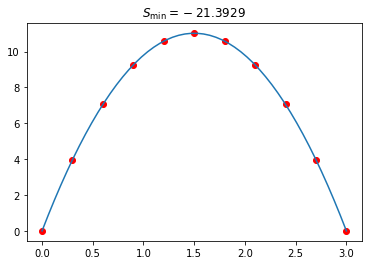

In [0]:
plt.plot(t,x,'ro')
T=np.linspace(0,3)
plt.plot(T,P(T))
plt.title(r'$S_{\rm min}=%g$' %y[2])

In [0]:
t=3.
m=0.2
y=xfit(21,t,m)
x=y[0]
Smin=y[2]
Dt=t/x[:-1].size
tx=np.arange(0,t+Dt,Dt)

[0, 1]

### Further material
http://www.damtp.cam.ac.uk/user/nsm10/PrincLeaAc.pdf
https://jfuchs.hotell.kau.se/kurs/amek/prst/14_hpvp.pdf

https://www.coursera.org/learn/general-relativity/lecture/8UHtE/the-least-action-or-minimal-action-principle-part-1

https://jfi.uchicago.edu/~tten/from.panza/Physics185/Handouts/rubber-band%20analogy.pdf